# Titanic Notebook
 
 This dataset contains information about the 891 passensger on-board the Titanic.

- **PassensgerId**: ID assigned to the passenger 
- **Pclass**: The class of the ticket
- **Name**: The name of the passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger
- **SibSp**: Number of siblings accompanying the passenger
- **Parc**: Number of parents and children accompanying the passenger
- **Ticket**: Ticket number of passenger
- **Fare**: Fare paid for trip
- **Cabin**: Cabin ID assigned to the passenger
- **Embarked**: Port at which passenger embarked. Queenstown, Cherbourg, and Southampton
- **Survived**: 1 or 0 is the passenger survived or died, respectively

## Exploratory Data Analysis for Categorical Data

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
# Import data
titanicDf = pd.read_csv('./titanic.csv')

In [17]:
# Preview the dataframe
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# We want to remove numerical features but we may as add useless features in here.
numericalAndUselessFeats = ['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare']

titanicDf.drop(numericalAndUselessFeats, axis=1, inplace=True)

In [19]:
# Double check the data frame
titanicDf.head()

,Survived,Pclass,Sex,Cabin,Embarked
0,0,3,male,NaN,S
1,1,1,female,C85,C
2,1,3,female,NaN,S
3,1,1,female,C123,S
4,0,3,male,NaN,S


In [20]:
# Look at data types and number of values in the data frame
titanicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(2), object(3)
memory usage: 34.9+ KB


In [22]:
# Group data by cabin where data is available and missing
titanicDf.groupby( titanicDf['Cabin'].isnull() ).mean()

,Survived,Pclass
Cabin,,
False,0.666667,1.196078
True,0.299854,2.639010


In [24]:
# Adding a new feature (column) to the data frame
titanicDf['Cabin_ind'] = np.where(titanicDf['Cabin'].isnull(), 0, 1)

In [25]:
# Preview the data frame
titanicDf.head()

,Survived,Pclass,Sex,Cabin,Embarked,Cabin_ind
0,0,3,male,NaN,S,0
1,1,1,female,C85,C,1
2,1,3,female,NaN,S,0
3,1,1,female,C123,S,1
4,0,3,male,NaN,S,0


<Figure size 432x288 with 0 Axes>

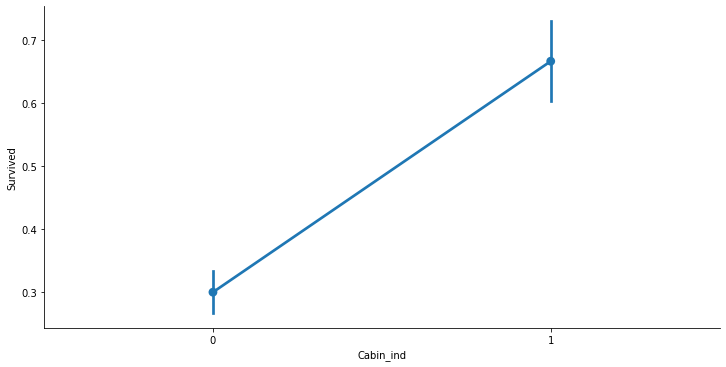

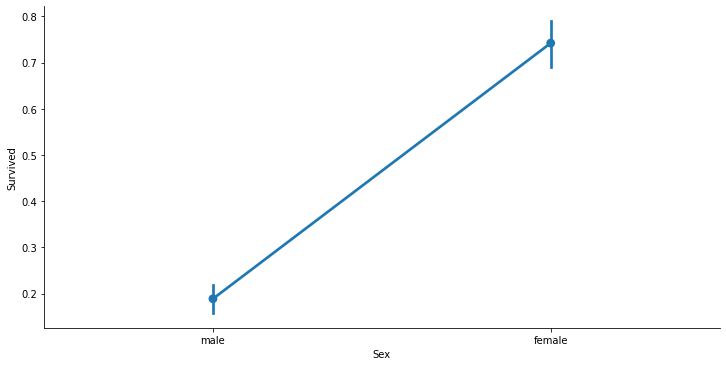

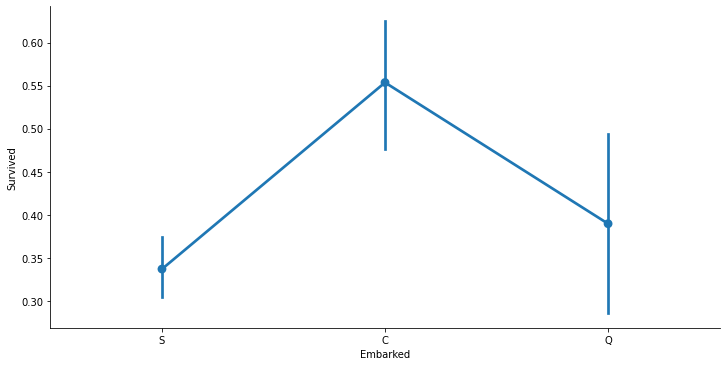

In [26]:
for i, col in enumerate(['Cabin_ind', 'Sex', 'Embarked']):
    # Use matplotlib to create a unique figure
    plt.figure(i)

    # Add a categorical plot to each figure
    sns.catplot(x=col, y='Survived', data=titanicDf, kind='point', aspect=2)

In [ ]:
# Southampton (England)
# Cherbourg (France)
# Queenstown (Ireland)

In [29]:
titanicDf.groupby( titanicDf['Sex'] ).size()

Sex
female    314
male      577
dtype: int64

In [30]:
titanicDf.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [31]:
titanicDf.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


In [32]:
titanicDf.pivot_table('Survived', index='Pclass', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353
